# === Personal Project ===
# eBay IPhone 14 Prices Prediction
This is a project for my Data Science Portofolio, currently ongoing.

Date: 11.27.2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set up pandas
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# 1. Load Dataframe
-> iPhone 14 Pro Max Prices

In [3]:
df = pd.read_csv('../Python_Data/ebay_iphone/ebay_iphone_14_pro_max.csv')

## 2. Data Preprocessing

In [4]:
df

,Title,Price
0,Apple iPhone 14 Pro Max 512GB Unlocked AT&T T-Mobile Verizon Very Good Condition,$884.95
1,Case For iPhone 15 Pro Max 14 Plus 13 12 11 XS Shockproof Full Protective Cover,$2.48 to $6.22
2,Apple iPhone 14 Pro Max A16 128GB 256GB 512GB 1TB Unlocked New Sealed,"$1,429.49 to $2,089.49"
3,Apple iPhone 14 Pro Max 256GB ( Unlocked) US E Sim - Excellent,$909.99
4,Apple iPhone 14 Pro Max - 128GB - Deep Purple (Unlocked) Smartphone,$810.00
5,NEW LISTINGApple iPhone 14 Pro Max - 128GB -Black Unlocked,$710.00
6,Apple iPhone 14 Pro Max 256GB ( Unlocked) US E Sim - Very Good,$889.99
7,Apple iPhone 14 Pro Max (space Black) - For Parts Only Not Working/ LCD Issue,$325.00
8,Apple iPhone 14 Pro Max 256GB Space Black Unlocked Fair Condition,$799.99
9,NEW LISTINGApple iPhone 14 Pro Max 256GB - Purple - BLOCKED ***Opened Never Used***,$123.32


In [5]:
df.dtypes

Title    object
Price    object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   1023 non-null   object
 1   Price   1023 non-null   object
dtypes: object(2)
memory usage: 16.1+ KB


### 2.1. Data Cleaning

In [7]:
# drop all rows that contains price range (not only 1 iphone)
df = df.drop(df.loc[df['Price'].str.contains('to')].index)

In [8]:
# delete $ and replace , with .
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '').replace(',',''))

# convert to numeric
df['Price'] = pd.to_numeric(df['Price'])

In [9]:
df.dtypes

Title     object
Price    float64
dtype: object

In [10]:
df.describe()

,Price
count,994.000000
mean,1029.030885
std,1235.541807
min,3.720000
25%,750.000000
50%,906.990000
75%,1121.090000
max,35000.000000


In [12]:
## Remove outliers
upper_bound = 1800
lower_bound = 400
# based on the 25% quantile

df = df.drop(df.loc[df['Price'] > upper_bound].index)
df = df.drop(df.loc[df['Price'] < lower_bound].index)

C:\Users\azhar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\azhar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


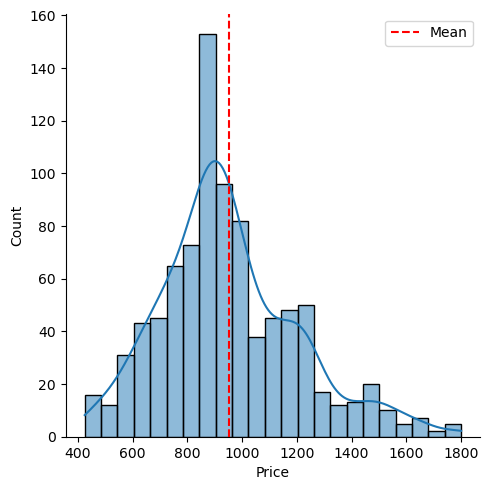

In [13]:
sns.displot(data=df, x=df['Price'], kde=True)
plt.axvline(x=np.mean(df['Price']), c='red', ls='--', label='Mean')
plt.legend()
plt.show()

In [14]:
df.count()

Title    888
Price    888
dtype: int64

In [33]:
df = df.reset_index().drop(columns='index')

In [34]:
df

,Title,Price
0,Apple iPhone 14 Pro Max 512GB Unlocked AT&T T-Mobile Verizon Very Good Condition,884.95
1,Apple iPhone 14 Pro Max 256GB ( Unlocked) US E Sim - Excellent,909.99
2,Apple iPhone 14 Pro Max - 128GB - Deep Purple (Unlocked) Smartphone,810.00
3,NEW LISTINGApple iPhone 14 Pro Max - 128GB -Black Unlocked,710.00
4,Apple iPhone 14 Pro Max 256GB ( Unlocked) US E Sim - Very Good,889.99
5,Apple iPhone 14 Pro Max 256GB Space Black Unlocked Fair Condition,799.99
6,NEW LISTINGApple iPhone 14 Pro Max - 256GB - Space Black (Carrier Locked) - CHECK ESN,530.00
7,NEW LISTINGApple iPhone 14 Pro Max - 128GB - Gold (T-Mobile),660.00
8,Apple iPhone 14 Pro Max 128GB Space Black Unlocked Fair Condition,769.99
9,Apple iPhone 14 Pro Max - 128GB - Space Black (Verizon) CHECK ESN - READ!,549.00


## 3. Feature Engineering

what affects the prices of the iPhone?
Based on the Title Column of df.
1. Condition:
    Damaged = 3, 
    Good = 2, 
    Very Good / Excellent = 1, 
    Brand New = 0
    
2. Storage: 1TB, 512GB, 256GB, 128GB
3. IMEI: if has check imei, prices may be less (needs to be compared)
4. ESN: if has check ESN or bad ESN, prices may be less
3. Color (?)
4. Unlocked -> A factory unlock for your iPhone lets you swap out your current service carrier for a new carrier or several.
    Unlocked tends to be more expensive.
    
Goals: Make new Column based on the categories that affected the prices.

In [36]:
df['Title'] = df['Title'].str.lower() 
# make all lower case for easier cleaning

In [38]:
df

,Title,Price
0,apple iphone 14 pro max 512gb unlocked at&t t-mobile verizon very good condition,884.95
1,apple iphone 14 pro max 256gb ( unlocked) us e sim - excellent,909.99
2,apple iphone 14 pro max - 128gb - deep purple (unlocked) smartphone,810.00
3,new listingapple iphone 14 pro max - 128gb -black unlocked,710.00
4,apple iphone 14 pro max 256gb ( unlocked) us e sim - very good,889.99
5,apple iphone 14 pro max 256gb space black unlocked fair condition,799.99
6,new listingapple iphone 14 pro max - 256gb - space black (carrier locked) - check esn,530.00
7,new listingapple iphone 14 pro max - 128gb - gold (t-mobile),660.00
8,apple iphone 14 pro max 128gb space black unlocked fair condition,769.99
9,apple iphone 14 pro max - 128gb - space black (verizon) check esn - read!,549.00


In [46]:
# 1 if unlocked else 0
df['carrier_lock'] = df['Title'].apply(lambda x: 1 if 'unlocked' in x else 0)

In [47]:
df

,Title,Price,carrier_lock
0,apple iphone 14 pro max 512gb unlocked at&t t-mobile verizon very good condition,884.95,1
1,apple iphone 14 pro max 256gb ( unlocked) us e sim - excellent,909.99,1
2,apple iphone 14 pro max - 128gb - deep purple (unlocked) smartphone,810.00,1
3,new listingapple iphone 14 pro max - 128gb -black unlocked,710.00,1
4,apple iphone 14 pro max 256gb ( unlocked) us e sim - very good,889.99,1
5,apple iphone 14 pro max 256gb space black unlocked fair condition,799.99,1
6,new listingapple iphone 14 pro max - 256gb - space black (carrier locked) - check esn,530.00,0
7,new listingapple iphone 14 pro max - 128gb - gold (t-mobile),660.00,0
8,apple iphone 14 pro max 128gb space black unlocked fair condition,769.99,1
9,apple iphone 14 pro max - 128gb - space black (verizon) check esn - read!,549.00,0


In [94]:
# make a damaged word list such as cracked, bad, broken, damaged
damaged_cond_word = ['cracked', 'broken', 'scratch','damage', 'bad', 'crack', 'dead']

# using regex, ignore some words (such as very)
good_cond_word = ['good', 'fair']

In [90]:
df.loc[df['Title'].str.contains('|'.join(damaged_cond_word))]

,Title,Price,carrier_lock
14,damaged apple iphone 14 pro max 128gb black unlocked - spares & repairs /f481,464.63,1
21,verizon apple iphone 14 pro max a2651 silver broken parts only read description,435.00,0
27,new listingapple iphone 14 pro max - 256gb - gold (at&t) (bad( (esn( read no returns,594.99,0
32,new verizon apple iphone 14 pro max 128gb mq8q3ll/a a2651 gold bad,724.99,0
33,apple iphone 14 pro - 128gb - silver (unlocked) some light scratching,730.00,1
43,apple iphone 14 pro max - 128gb - silver (unlocked) cracked back and bend,845.80,1
44,apple iphone 14 pro 128gb space black unlocked - cracked screen tmobile,550.00,1
66,apple iphone 14 pro max - silver (unlocked) cracked screen,435.98,1
69,cracked apple iphone 14 pro max a2651 256gb at&t check imei,540.96,0
82,at&t apple iphone 14 pro max esim 128gb 17.0.3 deep purple mq8r3ll/a a2651 bad,639.99,0


In [102]:
for x in df['Title']:
    if any(word in x for word in good_cond_word):
        if 'very' not in x:
            print(x)

apple iphone 14 pro max 256gb space black unlocked fair condition
apple iphone 14 pro max 128gb space black unlocked fair condition
apple iphone 14 pro max 256gb silver unlocked - fair condition
apple iphone 14 pro max 512gb deep purple unlocked fair condition
apple iphone 14 pro max 128gb deep purple | unlocked | good condition
apple iphone 14 pro max 512gb unlocked at&t t-mobile verizon fair condition
apple iphone 14 pro max 128gb deep purple verizon good condition
apple iphone 14 pro max a2651 at&t purple fair condition check imei
iphone 14 pro max - factory unlocked - 256gb - black - fair
apple iphone 14 pro max a2651 256gb t-mobile fair condition check imei
apple iphone 14 pro max 256gb deep purple unlocked good condition
apple iphone 14 pro max 128gb deep purple unlocked fair condition
iphone 14 pro max - verizon only - 512gb - purple - fair
apple iphone 14 pro max 128gb deep purple unlocked good condition
iphone 14 pro max - unlocked - 512gb - black - good
apple iphone 14 pro ma